<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoUB.jpeg"></img>
<center>
<p>
<h1>Algorísmica Avançada</h1>
<h2>Introducció A Networkx </h2>
</center>
</p>
</div>

<div>Recorda que per fer servir Networkx l'has d'instal.lar prèviament al teu ordinador. I des d'Anaconda, si vols veure els gràfics primer has de cridar %matplotlib inline</div>

<div class="alert alert-info"><strong>Llegeix les instruccions d'instal.lació de Networkx a http://networkx.readthedocs.io/en/networkx-1.11/install.html</strong> </div>

## 1 Manipulació bàsica de grafs

En aquesta pràctica s'introdueixen les eines bàsiques de manipulació de grafs. Amb networkx els grafs bàsics són no-dirigits.

Podeu consultar :
+ http://networkx.lanl.gov/tutorial (manual de Networkx)
+ http://networkx.lanl.gov/reference (referència de comandes)
+ http://networkx.lanl.gov/reference/classes.html (tipus de grafs)

per a més informació

In [2]:
#Creació d'un graf buit
%matplotlib inline
from pylab import *
import networkx as nx

G=nx.Graph()


In [3]:
# Afegim vèrtexs i arestes
G.add_node(5)
G.add_node(6)
G.add_edge(5,6)
pos=nx.circular_layout(G) 
   # amb aquest atribut farem que els nodes es distribueixin en un cercle

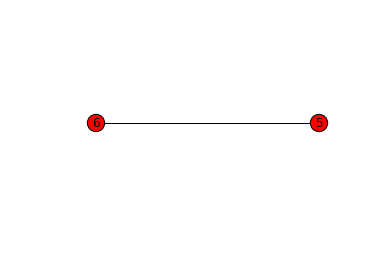

In [4]:
#el mostrem a pantalla
plt.axis('off') #no volem que dibuixi els eixos
nx.draw(G,pos) #dibuixem nodes i arestes
labels=   nx.draw_networkx_labels(G,pos) #dibuixem etiquetes

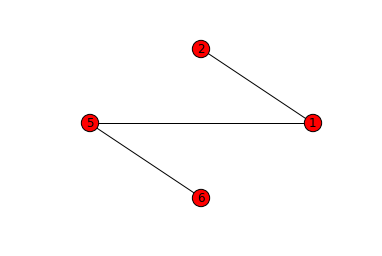

In [5]:
# Si afegim arestes amb vèrtexs inexistents, els crea
G.add_edge(1,5)
G.add_edge(1,2)
plt.axis('off') 
pos=nx.circular_layout(G) 
nx.draw(G,pos) 
labels=nx.draw_networkx_labels(G,pos) 


In [6]:
#Podem consultar informació del graf
G.nodes()

[1, 2, 5, 6]

In [7]:
G.edges()

[(1, 2), (1, 5), (5, 6)]

In [8]:
G.number_of_nodes()

4

In [9]:
G.number_of_edges()

3

In [10]:
G.neighbors(5)

[1, 6]

# 2 Llegir i escriure grafs des de fitxers

Networkx inclou funcions per llegir gràfics des d'un fitxer o escriure'ls, podeu trobar més informació a:
http://networkx.readthedocs.io/en/networkx-1.11/reference/readwrite.adjlist.html

Amb el Notebooks se us ha entregat un fitxer de text (MyFirstGraf.adjlist) que té un graf senzill escrit com una llista d'adjacència, és a dir a cada línia hi ha el node i la llista dels seus nodes veïns. 

A la primera secció de codi llegim aquest graf i el mostrem.

A la segona secció fem l'operació inversa, agafem el graf que haviem creat prèviament, G, i el guardem com a fitxer, i finalment mostrem el fitxer.

In [11]:
# Primer mostrem el contingut del fitxer amb la llista d'adjacència
with file("MyFirstGraf.adjlist") as f:
    text=f.readlines()
for line in text:
    print line    
    
# Després dibuixem el graf
G2=nx.read_adjlist("MyFirstGraf.adjlist")
pos2=nx.circular_layout(G2) # amb aquest atribut farem que els nodes es distribueixin en un cercle
plt.axis('off') 
nx.draw(G2,pos2) 
labels=nx.draw_networkx_labels(G2,pos2) 

IOError: [Errno 2] No such file or directory: 'MyFirstGraf.adjlist'

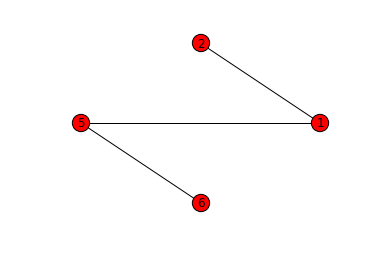

In [42]:
# Ara primer dibuixem el graf que ja haviem creat anteriorment
pos=nx.circular_layout(G) # amb aquest atribut farem que els nodes es distribueixin en un cercle
plt.axis('off') 
nx.draw(G,pos) 
labels=nx.draw_networkx_labels(G,pos) 



In [43]:
#El guardem en un fitxer com a llista d'adjacència
nx.write_adjlist(G,"test.adjlist")


# I després mostrem el contingut del fitxer amb la llista d'adjacència
with file("test.adjlist") as f:
    text=f.readlines()
for line in text:
    print line    

#C:\Anaconda\lib\site-packages\ipykernel\__main__.py -f C:\Users\Mireia Ribera\AppData\Roaming\jupyter\runtime\kernel-87bdba84-dd05-4370-bf2a-d0a118874467.json

# GMT Sat Aug 20 21:16:20 2016

# 

1 2 5

2

5 6

6



# 3 Funcions avançades de la llibreria Networkx

La llibreria disposa d'un conjunt de grafs ja definiits, com per exemple el graf de Petersen (http://en.wikipedia.org/wiki/Petersen_graph). I també d'algorismes bàsics com el DFS (Depth First Search) o altres.

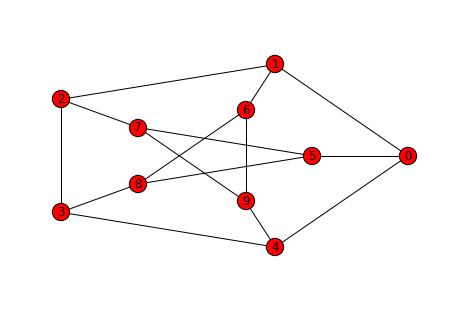

In [44]:
GP = nx.petersen_graph()
posGP=nx.shell_layout(GP,nlist=[range(5,10), range(5)])
nx.draw(GP, posGP)
labels=nx.draw_networkx_labels(GP,posGP)


In [45]:
GP.edges()

[(0, 1),
 (0, 4),
 (0, 5),
 (1, 2),
 (1, 6),
 (2, 3),
 (2, 7),
 (3, 8),
 (3, 4),
 (4, 9),
 (5, 8),
 (5, 7),
 (6, 8),
 (6, 9),
 (7, 9)]

In [46]:
GP.number_of_edges()

15

In [47]:
GP.nodes()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [48]:
GP.number_of_nodes()

10

## Algorisme DFS
L'algorisme DFS és el que hi ha a continuació (correspon a la funció explore definida a les
transparències del curs d'Algorísmica Avançada). Observeu que es tracta d'un algorisme recursiu que
guarda en un graf H és arestes del graf G per les quals va passant.

### Pseudocodi

    funcio main  
        ''' Sigui G = (Vg,Eg) el graf original  
        Sigui v el vèrtex inicial d'exploració  
        Sigui H = (Vh,Eh) el graf resultant d'aplicar DFS  
        Iniciem l'algorisme amb un graf H buit'''  
        Eh = {}, Vh = {}  
        visitats = {}  
        explora(v)  
  
  
    funcio explora(u)  
         Vh = Vh U {u}  
         visitats = visitats U {u}  
         per a cada veí k de u no visitat fer:  
             Eh = Eh U {(k,u)}  
             explora(k)  

In [49]:
#Apliquem l'algoritme DFS i guardem el resultat en un nou graf que anomenem DFS
DFS=nx.dfs_tree(GP,0)

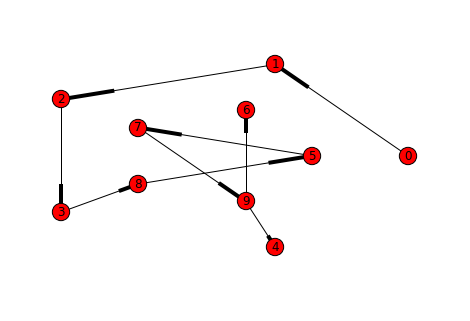

In [50]:
#L'observem gràficament
posDFS=nx.shell_layout(DFS,nlist=[range(5,10), range(5)])
nx.draw(DFS, posDFS)
labels=nx.draw_networkx_labels(DFS, posDFS)

In [51]:
#N'observem les característiques
DFS.edges()

[(0, 1), (1, 2), (2, 3), (3, 8), (5, 7), (7, 9), (8, 5), (9, 4), (9, 6)]

In [52]:
DFS.nodes()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### Observacions 

Observeu les arestes del graf DFS. No hi són totes, només les del camí mínim. 

Observeu també la llista de vèrtexs de DFS: és la mateixa que la del graf GP original! Això indica que l'algorisme DFS ha estat capaç d'arribar a tots els vèrtexs del graf. Es diu doncs que aquest graf es connex.

Si comencem el graf DFS per un altre vèrtex l'estructura serà diferent però el graf resultant tindrà el mateix nombre de nodes i arestes que l'exemple anterior.

In [53]:
DFS2=nx.dfs_tree(GP,5)

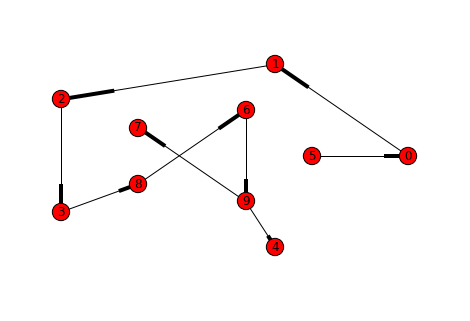

In [54]:
posDFS2=nx.shell_layout(DFS2,nlist=[range(5,10), range(5)])
nx.draw(DFS2, posDFS2)
labels=nx.draw_networkx_labels(DFS2, posDFS2)

In [55]:
DFS2.edges()  #són unes altres

[(0, 1), (1, 2), (2, 3), (3, 8), (5, 0), (6, 9), (8, 6), (9, 4), (9, 7)]

In [56]:
DFS.nodes()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### Anàlisi connectivitat

En particular, l'algorisme DFS es pot utilitzar per comprovar si un graf és connex.

Provarem aquesta funció amb una variació del graf de Petersen, al que afegirem dos vertexs.

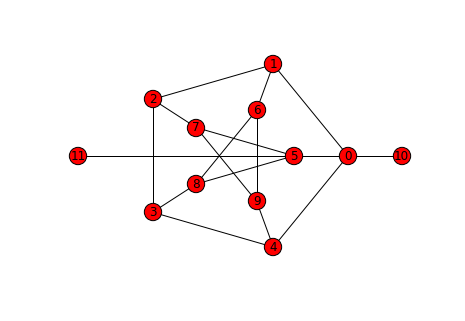

In [57]:
GP.add_edge(10,11)
posGP=nx.shell_layout(GP,nlist=[range(5,10), range(5),range(10,12)])
nx.draw(GP, posGP)
labels=nx.draw_networkx_labels(GP, posGP)

In [58]:
GP.nodes()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

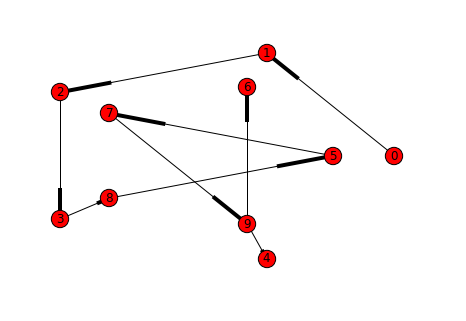

In [59]:
# Apliquem de nou el DFS
DFS3=nx.dfs_tree(GP,0)
#L'observem gràficament
posDFS3=nx.shell_layout(DFS3,nlist=[range(10,12),range(5,10), range(5)])
nx.draw(DFS3, posDFS3)
labels=nx.draw_networkx_labels(DFS3, posDFS3)

In [60]:
#Els nous nodes no apareixen al DFS!
DFS3.nodes()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

### Múltiples arbres
Com que els vèrtexs 10 i 11 no estan connectats amb la resta, el DFS no hi arriba. Podem crear un altre DF a partir del vèrtex 10.

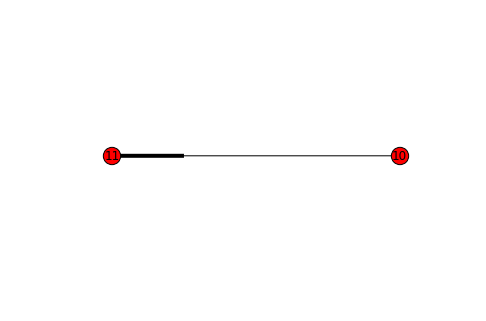

In [61]:
# Apliquem de nou el DFS
DFS4=nx.dfs_tree(GP,10)
#L'observem gràficament
posDFS4=nx.shell_layout(DFS4,nlist=[range(10,12),range(5,10), range(5)])
nx.draw(DFS4, posDFS4)
labels=nx.draw_networkx_labels(DFS4, posDFS4)

### Experimentant

Prova tu mateix de connectar el vèrtex 10 amb un altre vèrtex del graf de Petersen
original i aplica de nou l'algorisme de DFS fins a trobar tots els camins mínims del nou graf.

## Recorreguts en un graf

A l'hora de programar, la llibreria NetworkX permet accedir molt fàcilment als vèrtexs i arestes del
graf gràcies a l'estructura interna amb que guarda els grafs. Per accedir als vèrtexs d'un graf podeu usar una estructura for.

In [62]:
for n in GP:
    print n

0
1
2
3
4
5
6
7
8
9
10
11


I també podem accedir als veïns fàcilment

In [63]:
for n in G:
    for nbr in G[n]:
        print "El node",n,"te com a veí a",nbr

El node 1 te com a veí a 2
El node 1 te com a veí a 5
El node 2 te com a veí a 1
El node 5 te com a veí a 1
El node 5 te com a veí a 6
El node 6 te com a veí a 5


# 4 Atributs de vèrtexs i arestes

Networkx permet assignar valors (més d'un) als vèrtexs i les arestes i després consultar-los.

In [64]:
G = nx.Graph()
G.add_edge(1,2)
G.node[1]['nom']='Barcelona'
G.node[2]['nom']='Girona'
G.edge[1][2]['distancia(km)'] = 150

In [65]:
G.node[1]['nom']

'Barcelona'

In [66]:
G.edge[1][2]['distancia(km)']

150

In [67]:
G.nodes(data=True) #Amb data=True estem dient que ens mostri els atributs

[(1, {'nom': 'Barcelona'}), (2, {'nom': 'Girona'})]

In [68]:
G.edges(data=True) #Amb data=True estem dient que ens mostri els atributs

[(1, 2, {'distancia(km)': 150})]

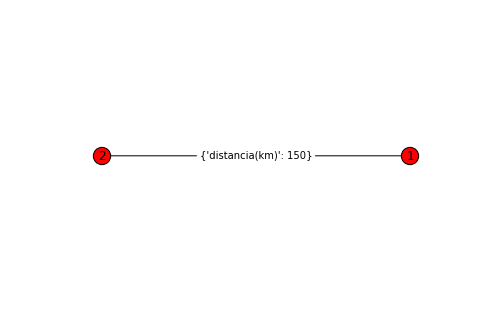

In [80]:
pos=nx.circular_layout(G)
nx.draw(G, pos)
labels=nx.draw_networkx_labels(G,pos)
labels=nx.draw_networkx_edge_labels(G, pos)